In [81]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/NXP/Mold Flash Prediction 2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# 將1~4欄字串型drop掉, 跑決策樹

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [83]:
dfdrop_tree = pd.read_excel('label_encoding_std-Original.xlsx', index_col=None)
dfdrop_tree.head(5)

,Assembly CG,Outline,Subpackage,Leadframe 12NC,Leadframe supplier,Rough?,Lead design,Square,Area,Unit per strip,Dimple?,Wire type,Compound,Taping,cat_ppm
0,0,41,76,19,1,0,2,0,8.75,1496,1,0,0,1,A
1,1,42,77,22,1,0,2,0,11.25,972,1,0,0,1,A
2,2,12,15,47,1,0,2,1,25.00,473,2,0,0,1,A
3,3,32,64,14,1,0,2,1,16.00,689,1,0,0,1,A
4,4,40,74,79,1,1,2,1,9.00,1173,1,0,3,1,A


In [84]:
# 把Unit per strip拿掉跑跑看

dfdrop_tree.drop(columns=['Assembly CG', 'Outline', 'Subpackage','Leadframe 12NC','Unit per strip'], inplace=True)

In [85]:
dfdrop_tree

,Leadframe supplier,Rough?,Lead design,Square,Area,Dimple?,Wire type,Compound,Taping,cat_ppm
0,1,0,2,0,8.750,1,0,0,1,A
1,1,0,2,0,11.250,1,0,0,1,A
2,1,0,2,1,25.000,2,0,0,1,A
3,1,0,2,1,16.000,1,0,0,1,A
4,1,1,2,1,9.000,1,0,3,1,A
...,...,...,...,...,...,...,...,...,...,...
89,1,0,2,0,18.000,1,0,0,1,A
90,1,0,2,1,4.000,1,0,0,1,A
91,1,0,2,0,2.295,1,0,0,1,A
92,1,0,2,0,2.520,1,0,0,1,A


In [86]:
### 資料分離

y = dfdrop_tree['cat_ppm']
x = dfdrop_tree.drop(['cat_ppm'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=1, random_state=42)
print("訓練集的維度大小: ", train_x.shape)
print("測試集的維度大小: ", test_x.shape)

訓練集的維度大小:  (93, 9)
測試集的維度大小:  (1, 9)


In [87]:
model = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5)
model.fit(train_x, train_y)

DecisionTreeClassifier(max_leaf_nodes=5)

In [88]:
def tree(num):
    model = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=num)
    model.fit(train_x, train_y)
    pred_y = model.predict(train_x)
    print("正確率為: ", metrics.accuracy_score(train_y, pred_y))
for i in range(2,10):
    tree(i)

正確率為:  0.7956989247311828
正確率為:  0.8064516129032258
正確率為:  0.8494623655913979
正確率為:  0.8709677419354839
正確率為:  0.8924731182795699
正確率為:  0.9032258064516129
正確率為:  0.9139784946236559
正確率為:  0.9139784946236559


In [90]:
model = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5)
model.fit(train_x, train_y)
pred_y = model.predict(train_x)
print("正確率為: ", metrics.accuracy_score(train_y, pred_y))

正確率為:  0.8709677419354839


[Text(0.5, 0.875, 'Leadframe supplier <= 0.5\ngini = 0.393\nsamples = 93\nvalue = [70, 18, 5]\nclass = A'),
 Text(0.25, 0.625, 'Area <= 30.5\ngini = 0.616\nsamples = 22\nvalue = [7, 11, 4]\nclass = B'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = A'),
 Text(0.375, 0.375, 'Lead design <= 1.5\ngini = 0.549\nsamples = 18\nvalue = [3, 11, 4]\nclass = B'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = C'),
 Text(0.5, 0.125, 'gini = 0.477\nsamples = 16\nvalue = [3, 11, 2]\nclass = B'),
 Text(0.75, 0.625, 'Area <= 56.5\ngini = 0.203\nsamples = 71\nvalue = [63, 7, 1]\nclass = A'),
 Text(0.625, 0.375, 'gini = 0.091\nsamples = 63\nvalue = [60, 3, 0]\nclass = A'),
 Text(0.875, 0.375, 'gini = 0.594\nsamples = 8\nvalue = [3, 4, 1]\nclass = B')]

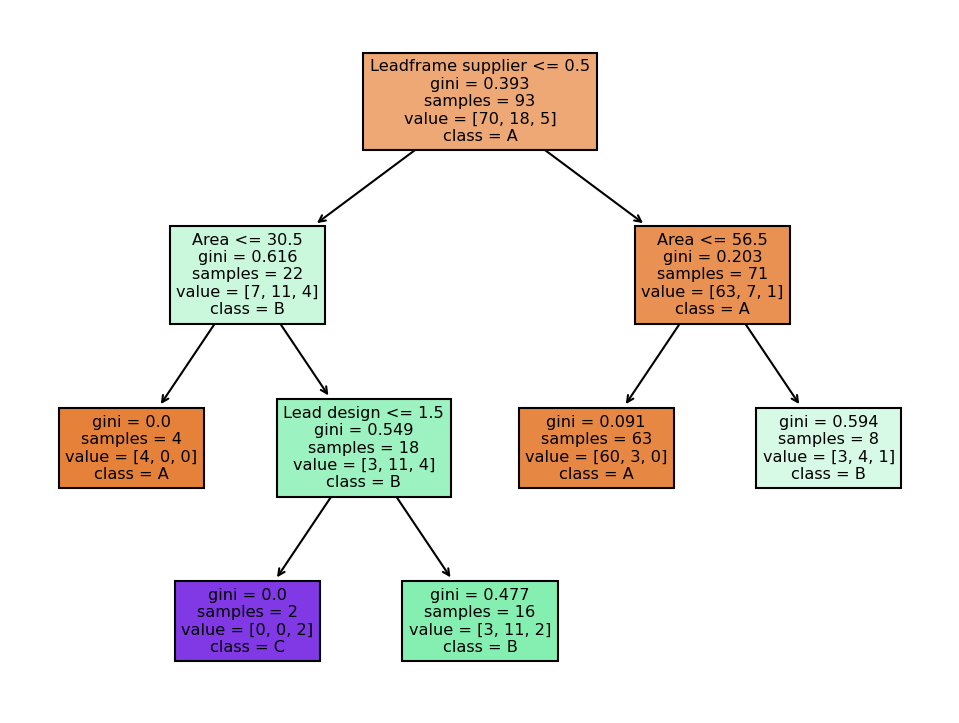

In [91]:
from sklearn import tree
import matplotlib.pyplot as plt

# 設定圖片大小和解析度 (dpi)
fig = plt.figure(figsize = (8,6), dpi= 150)

# 將filled設為True即可上色
tree.plot_tree(model, feature_names= x.columns,
              class_names = model.classes_, filled=True)
# 越純顏色越深

In [92]:
### 得到跟當初報告一樣的結果~
### 100%訓練 + 拿掉str類型資料 & unit per strip (因此欄與Area成反比;同意義)
### 但當初準確率計算 為拿此資料跑30%測試 + 70%訓練集

importances = model.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[::-1]
print ("Feature Importance Ranking:")
for i in range(x.shape[1]):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]}")

Feature Importance Ranking:
1. Leadframe supplier: 0.4666695800266463
2. Area: 0.41075831516798367
3. Lead design: 0.12257210480536994
4. Taping: 0.0
5. Compound: 0.0
6. Wire type: 0.0
7. Dimple?: 0.0
8. Square: 0.0
9. Rough?: 0.0


### 分30%測試集看看

In [93]:
### 將上面資料分30%測試集 + 70%訓練集跑看看~

### 資料分離

y = dfdrop_tree['cat_ppm']
x = dfdrop_tree.drop(['cat_ppm'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)
print("訓練集的維度大小: ", train_x.shape)
print("測試集的維度大小: ", test_x.shape)

訓練集的維度大小:  (65, 9)
測試集的維度大小:  (29, 9)


In [94]:
model = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5)
model.fit(train_x, train_y)

DecisionTreeClassifier(max_leaf_nodes=5)

In [95]:
# 看訓練集的準確度

def tree(num):
    model = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=num)
    model.fit(train_x, train_y)
    pred_y = model.predict(train_x)
    print("正確率為: ", metrics.accuracy_score(train_y, pred_y))
for i in range(2,10):
    tree(i)

正確率為:  0.8
正確率為:  0.8
正確率為:  0.8307692307692308
正確率為:  0.8615384615384616
正確率為:  0.8769230769230769
正確率為:  0.8769230769230769
正確率為:  0.9076923076923077
正確率為:  0.9076923076923077


In [97]:
model = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5)
model.fit(train_x, train_y)
pred_y = model.predict(train_x)
print("正確率為: ", metrics.accuracy_score(train_y, pred_y))

正確率為:  0.8615384615384616


[Text(0.4444444444444444, 0.875, 'Leadframe supplier <= 0.5\ngini = 0.427\nsamples = 65\nvalue = [47, 14, 4]\nclass = A'),
 Text(0.2222222222222222, 0.625, 'Area <= 30.5\ngini = 0.586\nsamples = 16\nvalue = [4, 9, 3]\nclass = B'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = A'),
 Text(0.3333333333333333, 0.375, 'gini = 0.52\nsamples = 14\nvalue = [2, 9, 3]\nclass = B'),
 Text(0.6666666666666666, 0.625, 'Area <= 42.5\ngini = 0.219\nsamples = 49\nvalue = [43, 5, 1]\nclass = A'),
 Text(0.5555555555555556, 0.375, 'gini = 0.093\nsamples = 41\nvalue = [39, 2, 0]\nclass = A'),
 Text(0.7777777777777778, 0.375, 'Rough? <= 0.5\ngini = 0.594\nsamples = 8\nvalue = [4, 3, 1]\nclass = A'),
 Text(0.6666666666666666, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [4, 1, 1]\nclass = A'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = B')]

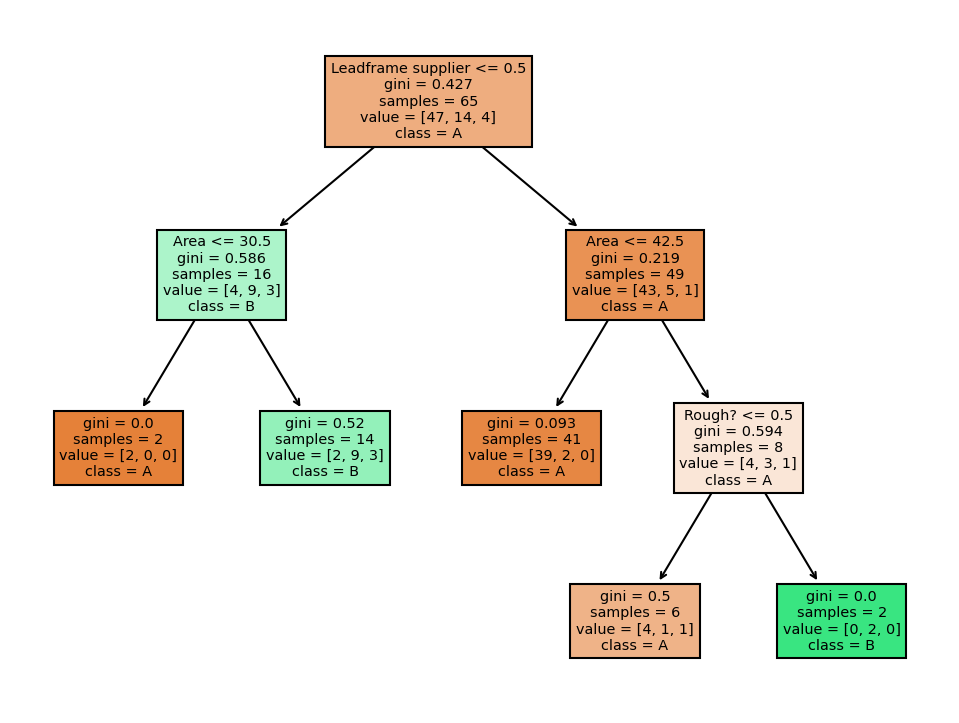

In [98]:
from sklearn import tree
import matplotlib.pyplot as plt

# 設定圖片大小和解析度 (dpi)
fig = plt.figure(figsize = (8,6), dpi= 150)

# 將filled設為True即可上色
tree.plot_tree(model, feature_names= x.columns,
              class_names = model.classes_, filled=True)
# 越純顏色越深

In [99]:
# 分為30%測試集的話術的分類結果會跟當初100%的分類結果不一樣~
# 但給的準確率是測試集的82.75%!!!
# 但給的feature_importance也是給100%分類結果的~
# 差別在lead_design & compound而已

importances = model.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[::-1]
print ("Feature Importance Ranking:")
for i in range(x.shape[1]):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]}")

Feature Importance Ranking:
1. Leadframe supplier: 0.559467925968605
2. Area: 0.31245130914642605
3. Rough?: 0.12808076488496908
4. Taping: 0.0
5. Compound: 0.0
6. Wire type: 0.0
7. Dimple?: 0.0
8. Square: 0.0
9. Lead design: 0.0


### 看測試集的準確率

In [100]:
pred_y = model.predict(test_x)

print("正確率為", metrics.accuracy_score(test_y, pred_y))
model.feature_names_in_

正確率為 0.8275862068965517


array(['Leadframe supplier', 'Rough?', 'Lead design', 'Square', 'Area',
       'Dimple?', 'Wire type', 'Compound', 'Taping'], dtype=object)